### 문제 1

Tumor counts: A cancer laboratory is estimating the rate of tumorigenesis in two strains of mice, A and B. They have tumor count data for 10 mice in strain A and 13 mice in strain B. Type A mice have been well studied, and information from other laboratories suggests that type A mice have tumor counts that are approximately Poisson-distributed with a mean of 12. Tumor count rates for type B mice are unknown, but type B mice are related to type A mice. The observed tumor counts for the two populations are

$$y_A = (12, 9, 12, 14, 13, 13, 15, 8, 15, 6)$$
$$y_B = (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7)$$


(a) Find the posterior distributions, means, variances and 95% quantilebased confidence intervals for $\theta_A$ and $\theta_B$, assuming a Poisson sampling distribution for each group and the following prior distribution:<br/>
$$
\theta_{A} \sim \operatorname{gamma}(120,10), \theta_{B} \sim \operatorname{gamma}(12,1), p\left(\theta_{A}, \theta_{B}\right)=p\left(\theta_{A}\right) \times p\left(\theta_{B}\right)
$$

In [1]:
import numpy as np
import pandas as pd

In [2]:
ya = np.array([12, 9, 12, 14, 13, 13, 15, 8, 15, 6])
yb = np.array([11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7])

In [3]:
print(sum(ya),len(ya))
print(sum(yb),len(yb))

117 10
113 13


- posterior distribution

$$\theta_A|y_a \sim \text{Gamma}(120+117,10+10) = \text{Gamma}(237,20)$$
$$\theta_B|y_b \sim \text{Gamma}(12+113,1+13) = \text{Gamma}(125,14)$$

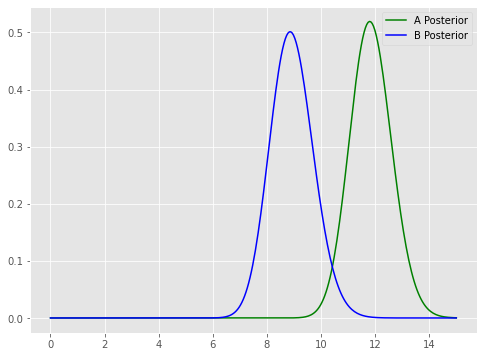

In [19]:
import scipy
import scipy.stats as st

thetas = np.linspace(0, 15, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, st.gamma(237,scale=1/20).pdf(thetas), label='A Posterior', color='green')
plt.plot(thetas, st.gamma(125,scale=1/14).pdf(thetas), label='B Posterior', color='blue')
plt.legend()

- mean, variance

$$E(\theta_A) = 237/20,\ E(\theta_B) = 125/14$$
$$Var(\theta_A) = 237/20^2,\ Var(\theta_B) = 125/14^2$$

- 95% quantilebased confidence intervals

In [4]:
from scipy.stats import gamma
def get_CI(a,b):
    lb = gamma.ppf(0.025, a, scale=1/b)
    ub = gamma.ppf(0.975, a, scale=1/b)
    return (lb,ub)

In [5]:
print(get_CI(237,20))
print(get_CI(125,14))

(10.389238190941795, 13.405448325642006)
(7.432064219464302, 10.560308149242363)


(b) Compute and plot the posterior expectation of $\theta_{B}$ under the prior distribution $\theta_{B} \sim \operatorname{gamma}\left(12 \times n_{0}, n_{0}\right)$ for each value of $n_{0} \in\{1,2, \ldots, 50\}$
Describe what sort of prior beliefs about $\theta_{B}$ would be necessary in order for the posterior expectation of $\theta_{B}$ to be close to that of $\theta_{A}$.

$$\theta_B|y_b \sim \text{Gamma}(12n_{0}+113,n_{0}+13)$$

In [6]:
def get_expectation(n):
    return (12*n+113)/(n+13)

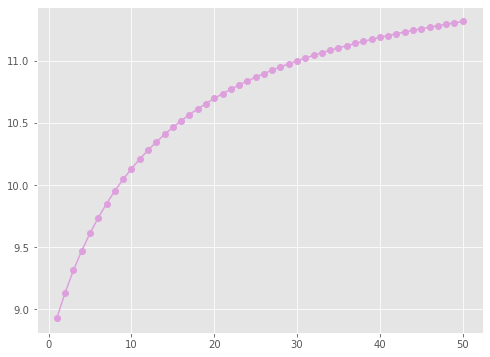

In [21]:
import matplotlib.pyplot as plt

thetas = np.linspace(1, 50, 50)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas,get_expectation(thetas),marker='o',c='plum')

$n_0$의 값이 커질수록 $\theta_A$의 기대값 11.86과 가까워지는 것을 확인할 수 있다. prior의 분산이 작을수록 ($12/n_0$) 즉 informative한 prior를 주었을 때 $\theta_A$의 기대값과 가까워진다

### 문제 2

Data가 binomial distribution일때, Likelihood를 Exponential Families 형태로
변환해 보기. 또한 왜 Beta distribution이 Conjugacy인지 생각해 보기

![](https://i.imgur.com/EPwT86U.jpg)

### 문제 3  

Relationship between Poisson distribution and Negative Binomial Distribution<br/>
$$X \sim N B(r, p)$$
$$
\begin{array}{l}
 \quad \text { where } p(X=x)=\left(\begin{array}{c}
r-1+x \\
x
\end{array}\right)(1-p)^{r} p^{x} \\
\text { Let mean } \frac{p r}{1-p}=\lambda \quad \rightarrow \quad p=\frac{\lambda}{r+\lambda}
\end{array}
$$

![](https://i.imgur.com/25NKM8B.png)

(b) 음이항분포의 분산이 포아송분포의 분산보다 크다(overdispersed). 포아송 분포는 하나의 파라미터($\lambda$)에 의해 평균 분산이 정해지는 반면 음이항분포는 두개의 파라미터를 이용해 평균 분산을 각각 지정해줄 수 있다. 따라서 데이터가 $\lambda$보다 분산이 더 큰 경우 음이항 분포를 이용해 표현해줄 수 있다.